In [13]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
# color pallette
cnf = '#393e46' # confirmed - grey
dth = '#ff2e63' # death - red
rec = '#21bf73' # recovered - cyan
act = '#fe9801' # active case - yellow
warnings.filterwarnings('ignore')

In [14]:
interested_countries=['China','Italy','Norway','France']

In [15]:
full_table = pd.read_csv('./data/covid_19_data.csv',sep=',',parse_dates=['ObservationDate'])
full_table.head()
cases = ['Confirmed', 'Deaths', 'Recovered', 'Active']
full_table['Active'] = full_table['Confirmed'] - full_table['Deaths'] - full_table['Recovered']
full_table['Country/Region'] = full_table['Country/Region'].replace('Mainland China', 'China')
full_table[['Province/State']] = full_table[['Province/State']].fillna('')
full_table[cases] = full_table[cases].fillna(0)

In [16]:
full_latest = full_table[full_table['ObservationDate'] == max(full_table['ObservationDate'])].reset_index()
full_latest_grouped = full_latest.groupby('Country/Region')['Confirmed', 'Deaths', 'Recovered', 'Active'].sum().reset_index()

In [17]:
formated_gdf = full_table.groupby(['ObservationDate', 'Country/Region'])['Confirmed', 'Deaths', 'Recovered'].max()
formated_gdf = formated_gdf.reset_index()
formated_gdf['ObservationDate'] = pd.to_datetime(formated_gdf['ObservationDate'])
formated_gdf['ObservationDate'] = formated_gdf['ObservationDate'].dt.strftime('%m/%d/%Y')
formated_gdf['size'] = formated_gdf['Confirmed'].pow(0.3)

fig = px.scatter_geo(formated_gdf, locations="Country/Region", locationmode='country names', 
                     color="Confirmed", size='size', hover_name="Country/Region", 
                     range_color= [0, max(formated_gdf['Confirmed'])+2], 
                     projection="natural earth", animation_frame="ObservationDate", 
                     title='Spread over time')
fig.update(layout_coloraxis_showscale=False)
fig.show()

In [18]:
# Confirmed
fig = px.choropleth(full_latest_grouped, locations="Country/Region", 
                    locationmode='country names', color="Confirmed", 
                    hover_name="Country/Region", range_color=[1,7000], 
                    color_continuous_scale="aggrnyl", 
                    title='Countries with Confirmed Cases')
fig.update(layout_coloraxis_showscale=False)
fig.show()

In [19]:
full_latest_grouped.head()

,Country/Region,Confirmed,Deaths,Recovered,Active
0,Afghanistan,521.0,15.0,32.0,474.0
1,Albania,416.0,23.0,182.0,211.0
2,Algeria,1761.0,256.0,405.0,1100.0
3,Andorra,601.0,26.0,71.0,504.0
4,Angola,19.0,2.0,2.0,15.0


In [20]:
# Deaths
fig = px.choropleth(full_latest_grouped[full_latest_grouped['Deaths']>0], 
                    locations="Country/Region", locationmode='country names',
                    color="Deaths", hover_name="Country/Region", 
                    range_color=[1,50], color_continuous_scale="agsunset",
                    title='Countries with Deaths Reported')
fig.update(layout_coloraxis_showscale=False)
fig.show()

In [21]:
fig = px.treemap(full_latest.sort_values(by='Confirmed', ascending=False).reset_index(drop=True), 
                 path=["Country/Region", "Province/State"], values="Confirmed", height=700,
                 title='Number of Confirmed Cases',
                 color_discrete_sequence = px.colors.qualitative.Prism)
fig.data[0].textinfo = 'label+text+value'
fig.show()

fig = px.treemap(full_latest.sort_values(by='Deaths', ascending=False).reset_index(drop=True), 
                 path=["Country/Region", "Province/State"], values="Deaths", height=700,
                 title='Number of Deaths reported',
                 color_discrete_sequence = px.colors.qualitative.Prism)
fig.data[0].textinfo = 'label+text+value'
fig.show()

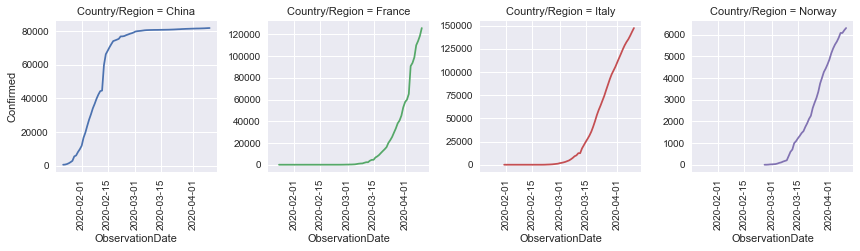

In [22]:
temp=full_table.loc[full_table['Country/Region'].isin(interested_countries)].groupby(['ObservationDate', 'Country/Region'])['Confirmed'].sum()
temp = temp.reset_index().sort_values(by=['ObservationDate', 'Confirmed'])
plt.style.use('seaborn')
g = sns.FacetGrid(temp, col="Country/Region", hue="Country/Region", 
                  sharey=False, col_wrap=5)
g = g.map(plt.plot, "ObservationDate", "Confirmed")
g.set_xticklabels(rotation=90)
plt.show()

In [23]:
temp_f = full_latest_grouped.sort_values(by='Confirmed', ascending=False)
temp_f = temp_f.reset_index(drop=True)
temp_f.head(20).style.background_gradient(cmap='Reds')

,Country/Region,Confirmed,Deaths,Recovered,Active
0,US,496535.000000,18586.000000,28790.000000,449159.000000
1,Spain,158273.000000,16081.000000,55668.000000,86524.000000
2,Italy,147577.000000,18849.000000,30455.000000,98273.000000
3,France,125931.000000,13215.000000,25195.000000,87521.000000
4,Germany,122171.000000,2767.000000,53913.000000,65491.000000
5,China,81907.000000,3336.000000,77472.000000,1099.000000
6,UK,74605.000000,8974.000000,588.000000,65043.000000
7,Iran,68192.000000,4232.000000,35465.000000,28495.000000
8,Turkey,47029.000000,1006.000000,2423.000000,43600.000000
9,Belgium,26667.000000,3019.000000,5568.000000,18080.000000


In [32]:
interested_countries=list(full_table.sort_values(by='Confirmed', ascending=False)['Country/Region'].unique()[0:10])
interested_countries.insert(0,'Norway')
temp=full_table.loc[full_table['Country/Region'].isin(interested_countries)].groupby(['ObservationDate', 'Country/Region'])['Confirmed'].sum().reset_index()
#temp = full_table.groupby(['ObservationDate', 'Country/Region'])['Confirmed'].sum().reset_index()

px.line(temp, x="ObservationDate", y="Confirmed", color='Country/Region', title='Cases Spread', height=600)

# Reference

https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset

https://www.kaggle.com/imdevskp/covid-19-analysis-viz-prediction-comparisons



# To do

Make a predictive model

Combine this dataset with weather and geographical data to get a better insight